In [4]:
# !pip install roboflow supervision opencv-python

- https://universe.roboflow.com/monopoly-poker/monopoly-poker/model/2

In [12]:
from roboflow import Roboflow
import supervision as sv
import cv2

In [22]:
roboflow_api_key = 'xxx'

In [7]:
rf = Roboflow(api_key=roboflow_api_key)
project = rf.workspace().project("monopoly-poker")
model = project.version(2).model

loading Roboflow workspace...
loading Roboflow project...


In [15]:
img_path = 'datasets/monopoly-poker/test/images/51_jpg.rf.f5e28133b59adff7fdb548b66755873e.jpg'

In [16]:
result = model.predict(img_path, confidence=40, overlap=30).json()

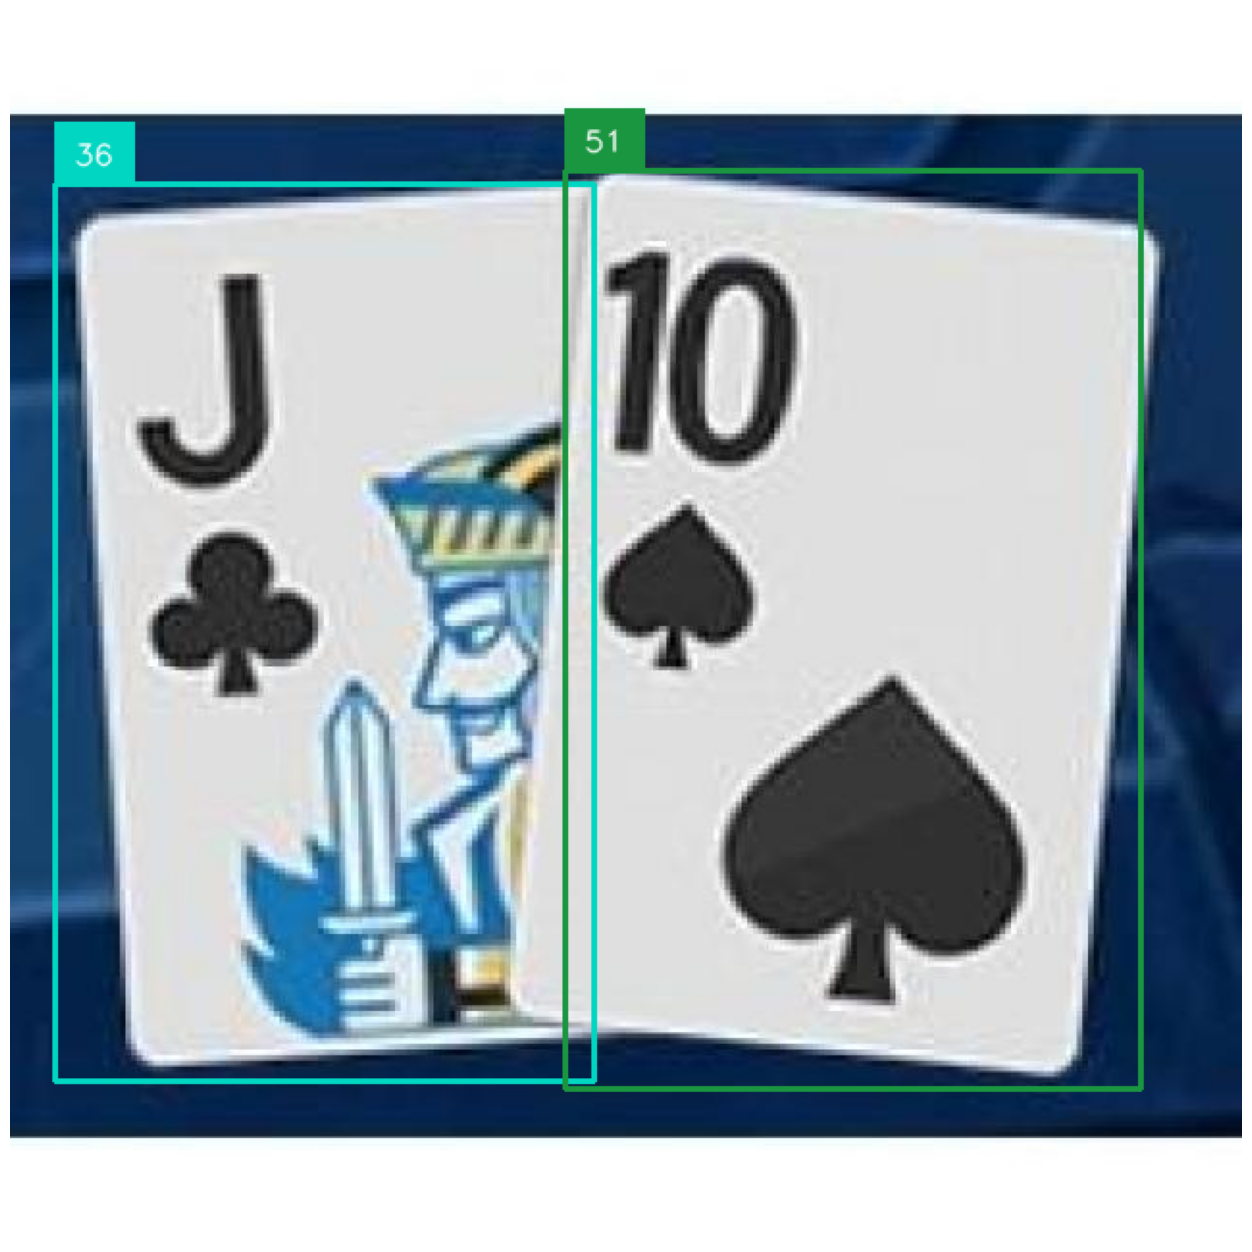

In [21]:
labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoundingBoxAnnotator()

image = cv2.imread(img_path)

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))